# Análisis de datos
# Tarea 4
## Ana Isabel Moreno Hernández
### NUA: 434232

## **Estadística y probabilidad I**

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import math
import scipy.stats
%matplotlib inline
plt.style.use('seaborn-whitegrid')

### **Gaussiana**

Utilizamos scipy para graficar la gaussiana, aunque también puede hacerse la distribución normal con una ecuación.

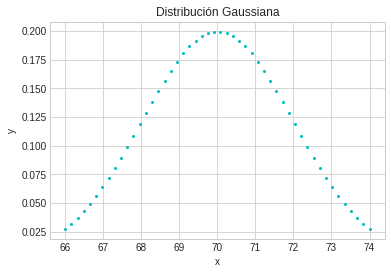

In [2]:
x_min = 66
x_max = 74

mean = 70
std = 2.0

x = np.linspace(x_min, x_max, 50)
y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Gaussiana')
plt.grid(True)

Y para graficar la distribución acumulada también hacemos uso de scipy. En códigos siguientes se mostrará cómo graficarlas sin utilizar scipy.

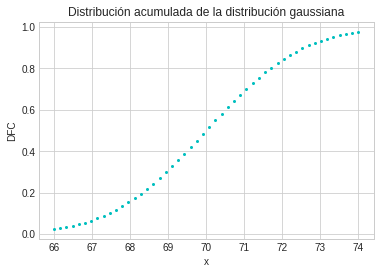

In [3]:
y_ac = scipy.stats.norm.cdf(x, mean, std)
plt.plot(x,y_ac,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución gaussiana')
plt.grid(True)

Ahora graficamos x contra la frecuencia acumulada. 

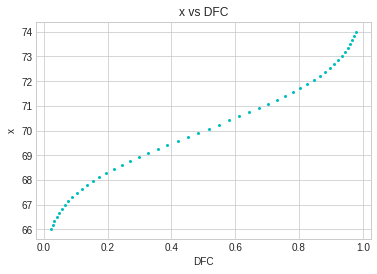

In [4]:
plt.plot(y_ac,x,'oc', markersize = 2)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Interpolamos para encontrar valores de x distintos a los de la primer gráfica utilizando interpolate.interp1d de scipy. En la gráfica se muestra los puntos que resultaron de interpolar y se observa claramente que son distintos a los de la gráfica anterior. 

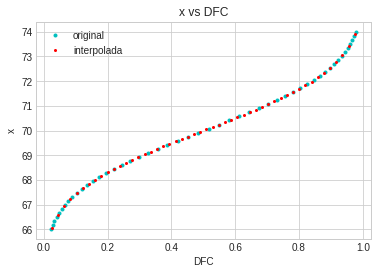

In [5]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,50)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 2, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y si hacemos un histograma con los valores nuevos de x, debemos obtener una distribución gaussiana otra vez.

Text(0, 0.5, 'Frecuencia')

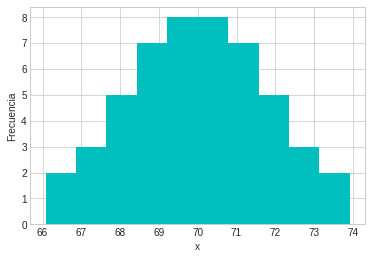

In [6]:
plt.hist(x_new, color = 'c');
plt.xlabel('x')
plt.ylabel('Frecuencia')

Utilizando seaborn, el histograma luce así:

Text(0, 0.5, 'y')

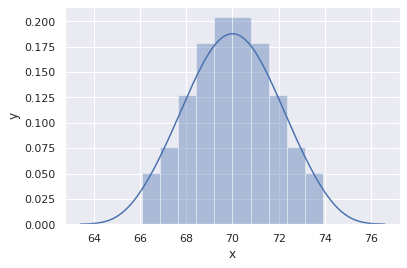

In [7]:
import seaborn as sns
sns.set()

sns.distplot(x_new, bins = 10)
plt.xlabel('x')
plt.ylabel('y')

Ahora, si en lugar de obtener la distribución gaussiana con scipy la obtenemos utilizando la función de probabilidades, tenemos lo siguiente:

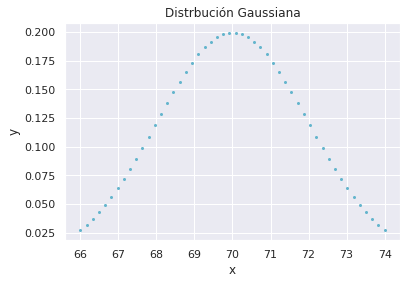

In [8]:
x_min = 66
x_max = 74

mean = 70
std = 2.0

x = np.linspace(x_min, x_max, 50)
y = (1/(std*(2*np.pi)**0.5))*np.exp(-(x-mean)**2/(2*std**2))

plt.plot(x,y,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distrbución Gaussiana')
plt.grid(True)

Y para obtener la distribución acumulada basta con hacer el siguiente ciclo:

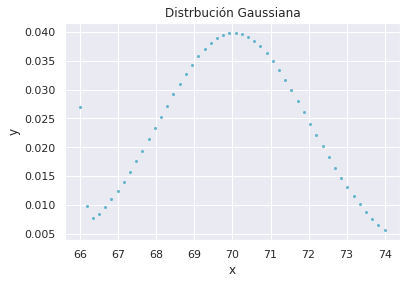

In [9]:
y_ac = np.zeros(50)

y_ac[0] = y[0]
for i in range(49):
    y_ac[i+1] = (y_ac[i] + y[i+1])/6
    
plt.plot(x,y_ac,'oc', markersize = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distrbución Gaussiana')
plt.grid(True)

### **Distribución de Poisson**

Graficamos la distribución de Poisson, tomando en cuenta que los valores de x deben ser enteros:

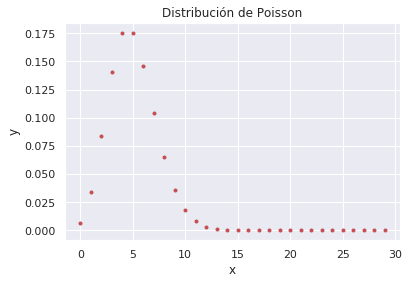

In [10]:
x_min = 0
x_max = 29

mu = 5

x = np.linspace(x_min, x_max, 30)
y = scipy.stats.poisson.pmf(x, mu)

plt.plot(x,y,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución de Poisson')
plt.grid(True)

Y ahora graficamos la distribución acumulada:

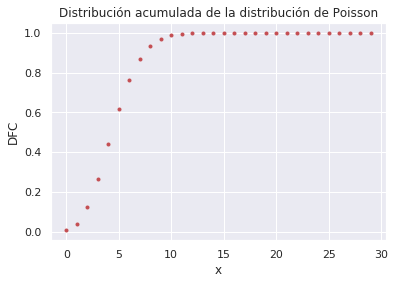

In [11]:
y_ac = scipy.stats.poisson.cdf(x, mu)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución de Poisson')
plt.grid(True)

Y x contra la frecuencia acumulada se ve como:

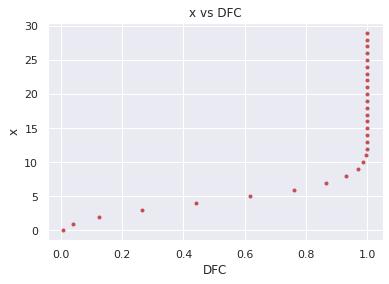

In [12]:
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Interpolamos como lo hicimos con la distribución gaussiana y graficamos los puntos interpolados y los puntos originales en la misma gráfica.

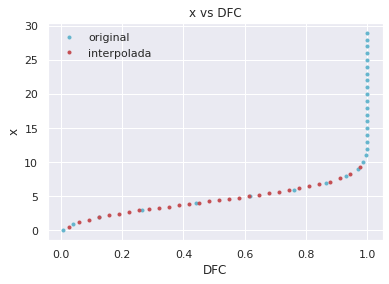

In [13]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,30)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de los puntos obtenidos en la interpolación, la gráfica que se obtiene tiene una distribución de Poisson.

Text(0, 0.5, 'y')

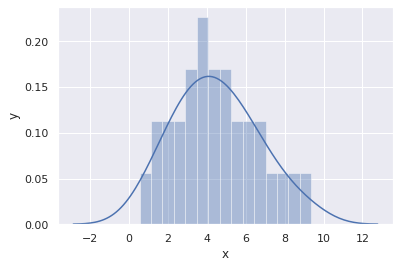

In [14]:
sns.distplot(x_new, bins = 15)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución beta**

Graficamos la distribución de Beta, utilizando scipy:

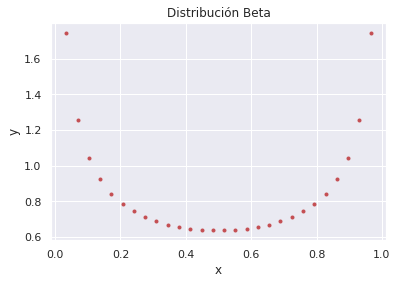

In [15]:
x_min = 0
x_max = 1

a = 0.5
b = 0.5

x = np.linspace(x_min, x_max, 30)
y = scipy.stats.beta.pdf(x, a, b)

plt.plot(x,y,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Beta')
plt.grid(True)

Y la acumulada se vería de la siguiente forma:

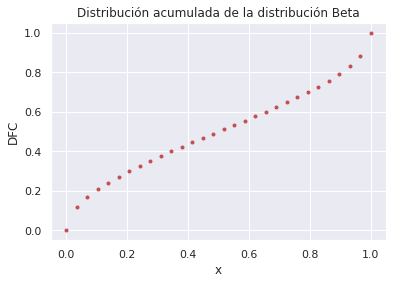

In [16]:
y_ac = scipy.stats.beta.cdf(x, a, b)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución Beta')
plt.grid(True)

Graficamos x contra DFC:

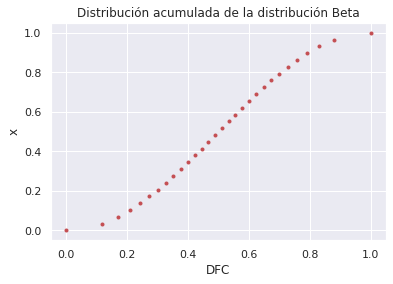

In [17]:
y_ac = scipy.stats.beta.cdf(x, a, b)
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución acumulada de la distribución Beta')
plt.grid(True)

Interpolamos para obtener nuevos valores en x:

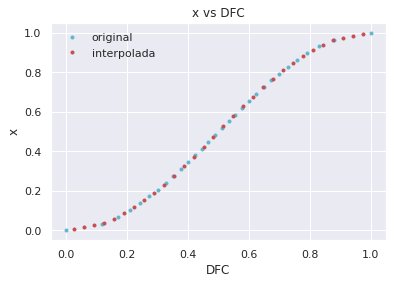

In [18]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,30)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de los nuevos valores de x (obtenidos en la interpolación), deberíamos obtener la misma tribución beta:

Text(0, 0.5, 'y')

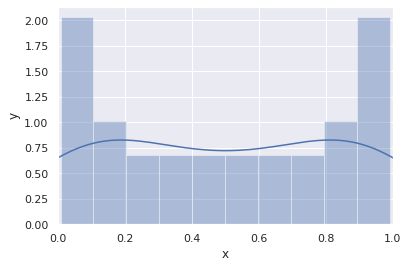

In [19]:
sns.distplot(x_new, bins = 10)
plt.xlim(0,1)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución binomial**

Nuevamente, graficamos la distribución binomial utilizando sicpy (en binomial x debe ser entero):

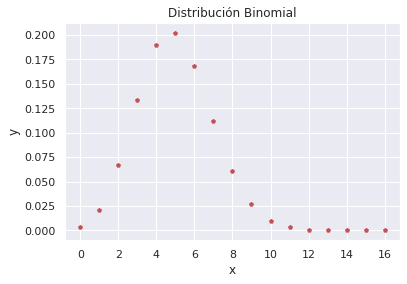

In [20]:
x_min = 0
x_max = 16

n = 20
p = 0.25

x = np.linspace(x_min, x_max, 17)
y = scipy.stats.binom.pmf(x, n, p)

plt.plot(x,y,'pr', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución Binomial')
plt.grid(True)

Y la distribución acumulada es:

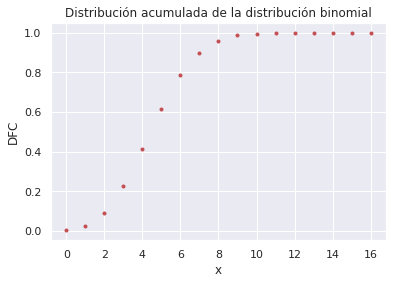

In [21]:
y_ac = scipy.stats.binom.cdf(x, n, p)
plt.plot(x,y_ac,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución acumulada de la distribución binomial')
plt.grid(True)

Graficamos x contra CDF:

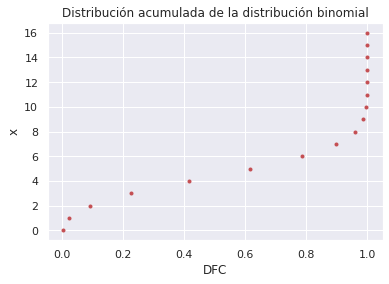

In [22]:
y_ac = scipy.stats.binom.cdf(x, n, p)
plt.plot(y_ac,x,'or', markersize = 3)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución acumulada de la distribución binomial')
plt.grid(True)

Interpolamos para obtener nuevos valores de x:

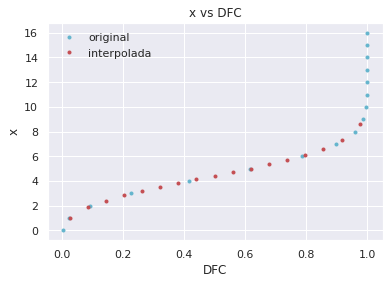

In [23]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.025,0.975,17)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma deberíamos de obtener una distribución binomial, muy parecida a la del inicio:

Text(0, 0.5, 'y')

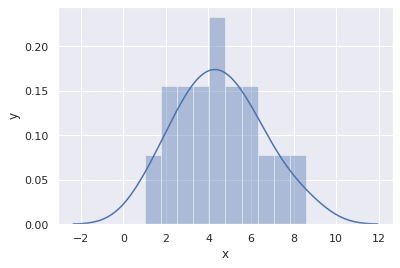

In [24]:
sns.distplot(x_new, bins = 10)
plt.xlabel('x')
plt.ylabel('y')

### **Distribución $\chi ^2$**

Utilizamos scipy para obtener la distribución de probabilidad:

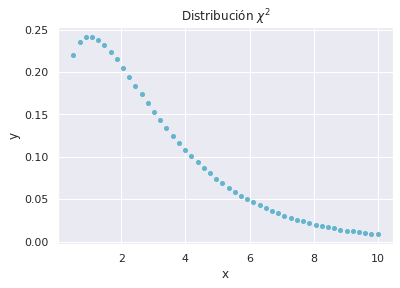

In [25]:
x_min = 0.5
x_max = 10

k = 3

x = np.linspace(x_min, x_max, 50)
y = scipy.stats.chi2.pdf(x,k)

plt.plot(x,y,'oc', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Graficamos la distribución acumulada:

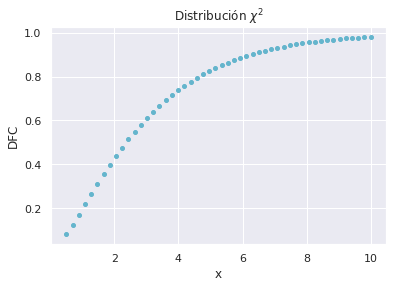

In [26]:
y_ac = scipy.stats.chi2.cdf(x,k)

plt.plot(x,y_ac,'oc', markersize = 4)
plt.xlabel('x')
plt.ylabel('DFC')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Graficamos x contra la distribución acumulada:

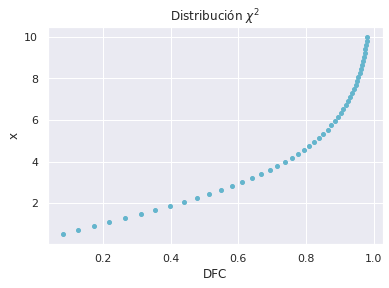

In [27]:
plt.plot(y_ac,x,'oc', markersize = 4)
plt.xlabel('DFC')
plt.ylabel('x')
plt.title('Distribución $\chi ^2$')
plt.grid(True)

Interpolamos:

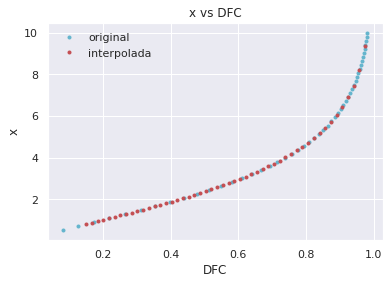

In [28]:
f = scipy.interpolate.interp1d(y_ac, x)
y_new = np.linspace(0.15,0.975,50)

x_new = f(y_new)

plt.plot(y_ac,x,'oc', markersize = 3, label = 'original')
plt.plot(y_new,x_new,'or',markersize = 3, label = 'interpolada')
plt.xlabel('DFC')
plt.legend()
plt.ylabel('x')
plt.title('x vs DFC')
plt.grid(True)

Y al plotear el histograma de x_new, regresamos a la distribución $\chi ^2$

Text(0, 0.5, 'y')

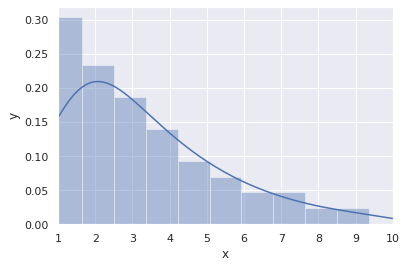

In [29]:
sns.distplot(x_new, bins = 10)
plt.xlim(1,10)
plt.xlabel('x')
plt.ylabel('y')

### **Transformation of variables**

Generamos ditribuciones uniformes para $r$ y $\theta$:

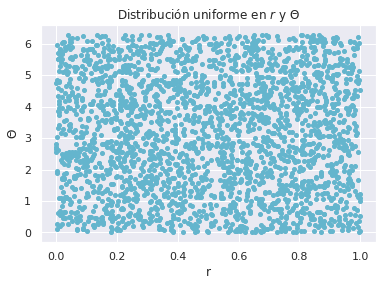

In [71]:
r = np.random.uniform(0,1,2500)
theta = np.random.uniform(0,2*np.pi,2500)

plt.plot(r,theta,'oc', markersize = 4)
plt.xlabel('r')
plt.ylabel('$\Theta$')
plt.title('Distribución uniforme en $r$ y $\Theta$')
plt.grid(True)

Y definimos x y y como $x = rcos\theta$ y $y = rsin\theta$, luego los graficamos:

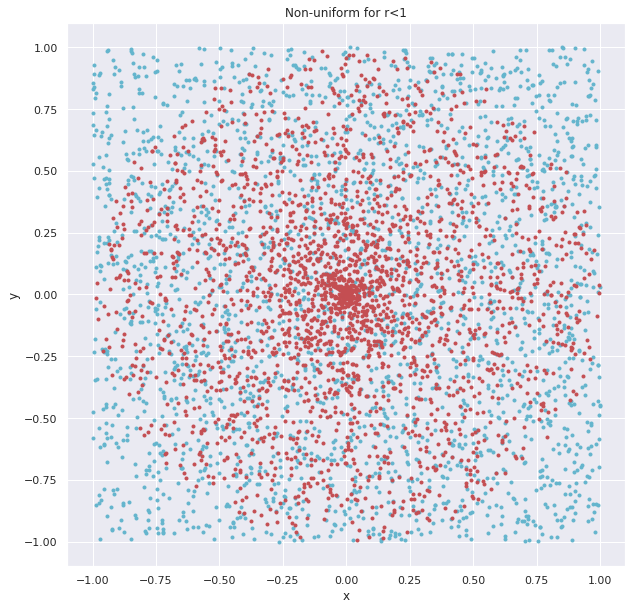

In [72]:
x = np.random.uniform(-1,1,2500)
y = np.random.uniform(-1,1,2500)

x_n = r*np.cos(theta)
y_n = r*np.sin(theta)

plt.figure(figsize = (10,10))
plt.plot(x,y,'oc', markersize = 3)
plt.plot(x_n,y_n,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-uniform for r<1')
plt.grid(True)

Y en esta última puede observarse la no distribución uniforme para x y y. 

Sin embargo, si hacemos una distribución uniforme en $x$ y $y$ y seleccionamos sólo aquellos puntos en donde $r = \sqrt(x^2 + y^2)$ y es menor que 1 obtenemos:

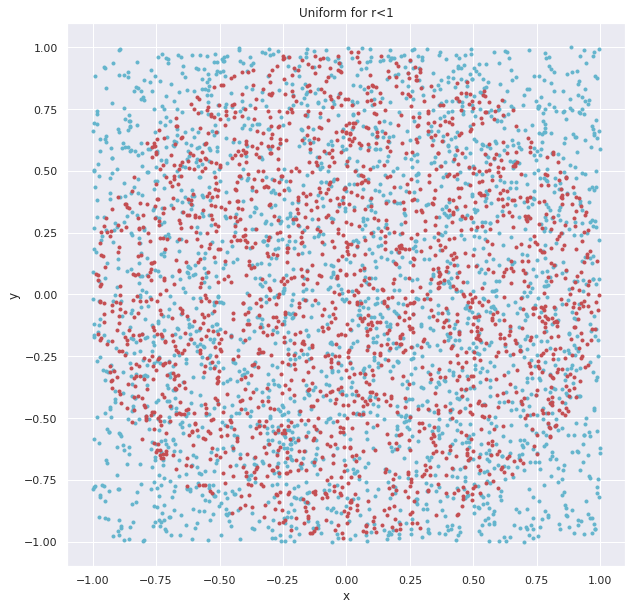

In [90]:
x = np.random.uniform(-1,1,2500)
y = np.random.uniform(-1,1,2500)

x1 = np.random.uniform(-1,1,2500)
y1 = np.random.uniform(-1,1,2500)

raiz = np.sqrt(x1**2 + y1**2)
r1 = []
theta1 = []

for i in range(2500):
    if raiz[i] <= 1.00:
        r1.append(raiz[i])
        theta1.append(math.atan2(y1[i],x1[i]))

x_new = r1*np.cos(theta1)
y_new = r1*np.sin(theta1)

plt.figure(figsize = (10,10))
plt.plot(x,y,'oc', markersize = 3)
plt.plot(x_new,y_new,'or', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform for r<1')
plt.grid(True)